## **Sentiment Analysis on IMDB Reviews - TF-IDF | BoW | Word2Vec Embeddings**




### **What is Sentiment Analysis?**

> **Sentiment Analysis** is a Natural Language Processing (NLP) technique used to identify the **emotional tone** behind a piece of text — typically classified as **positive**, **negative**, or **neutral**.

### **Objective:**

To automatically determine **how people feel** about a subject based on their written feedback.

### **How it works:**

* We train a model on **labeled text data** (like movie reviews with known sentiments).
* The model learns **patterns and keywords** associated with each sentiment.
* It can then predict the sentiment of **new reviews**.

### **Use Cases:**

* Analyzing customer feedback
* Tracking social media sentiment
* Evaluating product or movie reviews

### **In this project:**

We’ll analyze a **30KB IMDB movie review dataset** to classify each review as **positive or negative** using:

* **Python**
* **pandas**
* **scikit-learn**

### **Problem Statement:**

Sentiment analysis enables businesses and organisations to understand public opinion by identifying the
emotional tone in text. In this assignment, we will train sentiment classification models using IMDB
movie reviews, starting with TF-IDF vectorization and extending to Bag of Words and Word2Vec to
compare performance.

### **Step 1: Import Libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

import warnings
warnings.filterwarnings("ignore")


### **Step 2: Load Dataset**

In [24]:
df = pd.read_csv('imdb_reviews_with_emotions.csv', encoding='latin1')

# Display dataset shape
print(f" Dataset Shape: {df.shape}\n")

# Display a small sample of the dataset
print(" Sample Data:")
display(df.head())  # 'display' renders a clean table in Jupyter


 Dataset Shape: (25, 3)

 Sample Data:


,Id,Reviews,Emotion
0,1,"I'm no critic, but Coco is close to movie perf...",happy
1,2,Coco tells the story of young boy named Miguel...,happy
2,3,Pixar has done it AGAIN! 'Coco' is a yet anoth...,happy
3,4,I knew absolutely nothing about this movie wal...,happy
4,5,Im Mexican and all i can say is Thanks you Piz...,happy


### **Step 3: Text Preprocessing**

In [25]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- new, required in latest NLTK
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove special characters, numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Use the correct column name: 'review'
df['clean_review'] = df['Reviews'].astype(str).apply(preprocess_text)

df.head()


,Id,Reviews,Emotion,clean_review
0,1,"I'm no critic, but Coco is close to movie perf...",happy,critic coco close movie perfection definitely ...
1,2,Coco tells the story of young boy named Miguel...,happy,coco tell story young boy named miguel living ...
2,3,Pixar has done it AGAIN! 'Coco' is a yet anoth...,happy,pixar done coco yet another delightful ride pr...
3,4,I knew absolutely nothing about this movie wal...,happy,knew absolutely nothing movie walking reason t...
4,5,Im Mexican and all i can say is Thanks you Piz...,happy,im mexican say thanks pizax saw movie remember...


### **Step 4: Prepare Train-Test Split**

In [27]:
X = df['clean_review']
y = df['Emotion']   # target column with emotions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Step 5: Feature Extraction (TF-IDF and Bag of Words)**

In [28]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Bag of Words
bow = CountVectorizer(max_features=5000)
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)


### **Step 6: Helper Function for Training and Evaluation**

In [29]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique(), cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()



### **Step 7: Train Models with TF-IDF Features**


===== Logistic Regression =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



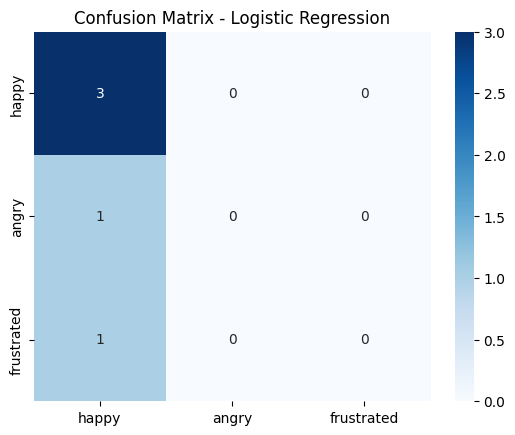


===== Naive Bayes =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



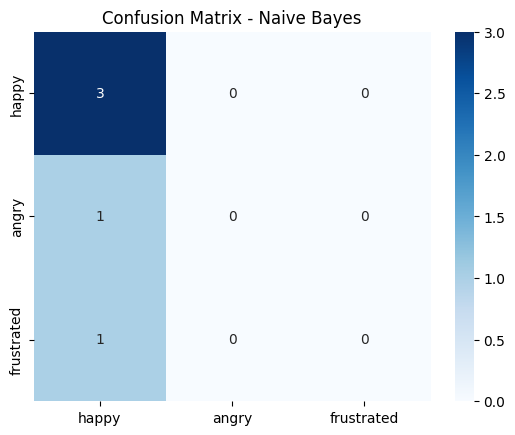


===== KNN (k=5) =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



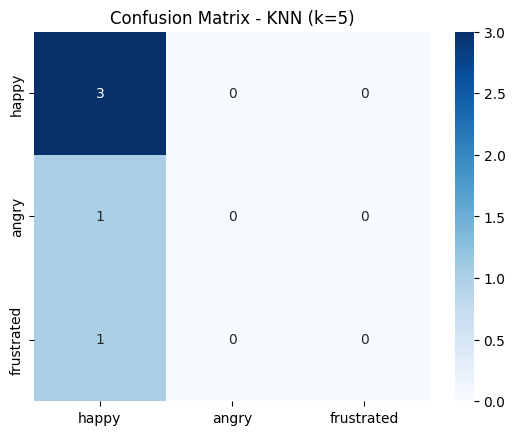


===== Decision Tree =====
Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.50      0.33      0.40         3

    accuracy                           0.20         5
   macro avg       0.17      0.11      0.13         5
weighted avg       0.30      0.20      0.24         5



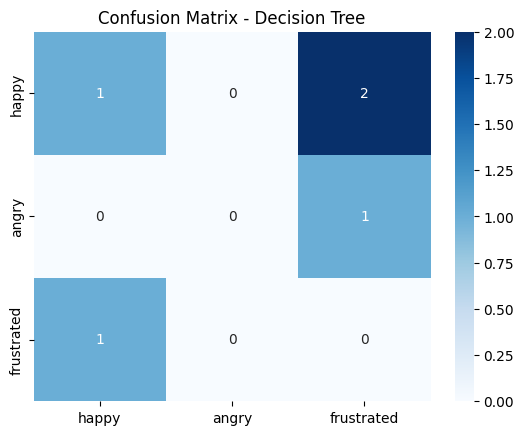


===== Random Forest =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



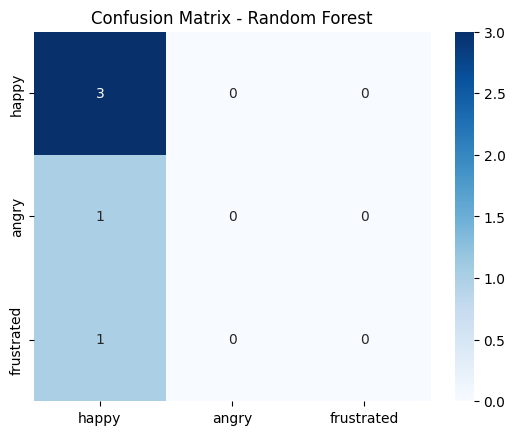


===== SVM =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



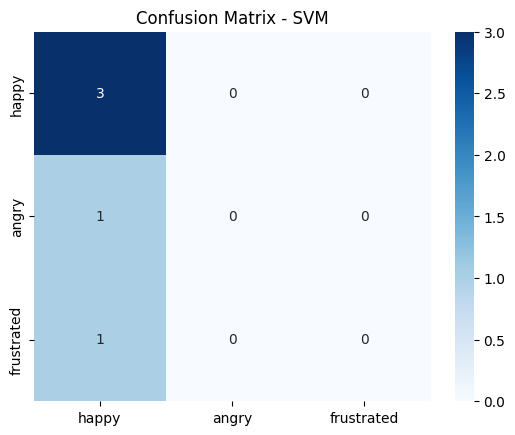

In [30]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

for name, model in models.items():
    evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test, name)


## **Step 8: Train Models with Bag of Words Features**

=== Bag of Words Models ===

===== Logistic Regression =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



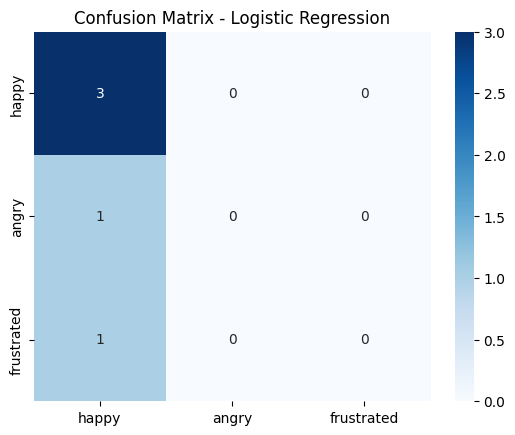


===== Naive Bayes =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



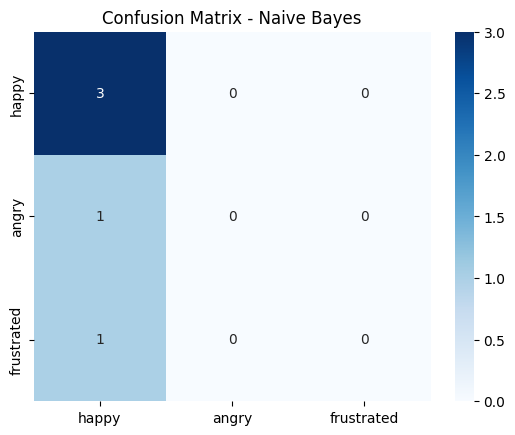


===== KNN (k=5) =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.75      1.00      0.86         3

    accuracy                           0.60         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.45      0.60      0.51         5



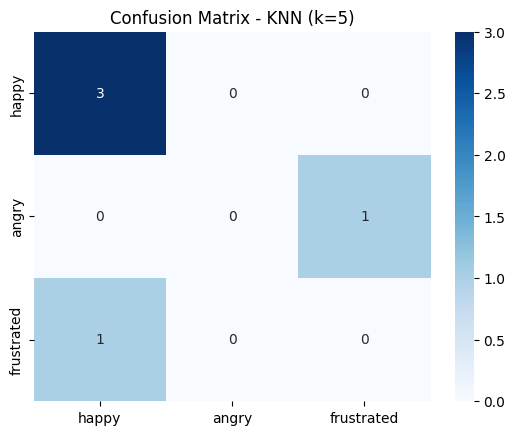


===== Decision Tree =====
Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.50      0.33      0.40         3

    accuracy                           0.20         5
   macro avg       0.17      0.11      0.13         5
weighted avg       0.30      0.20      0.24         5



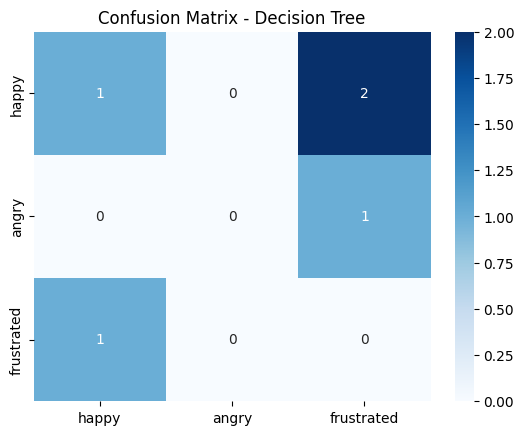


===== Random Forest =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



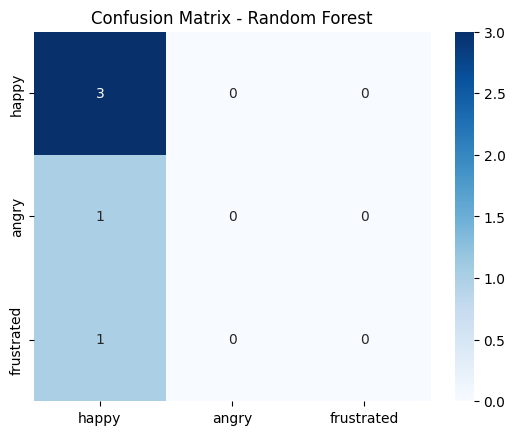


===== SVM =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



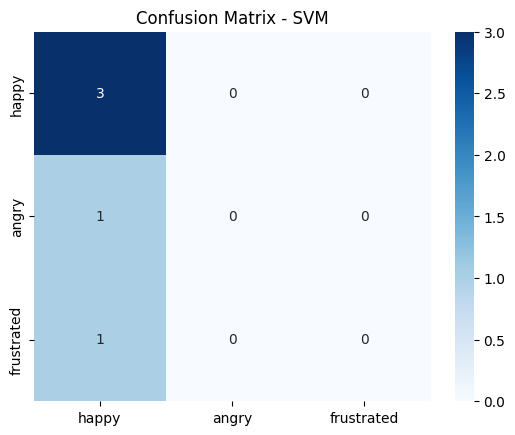

In [31]:
print("=== Bag of Words Models ===")
for name, model in models.items():
    evaluate_model(model, X_train_bow, X_test_bow, y_train, y_test, name)


### **Step 9: Train Models with Word2Vec Features**

In [32]:
!pip install gensim


In [33]:
from gensim.models import Word2Vec

# Tokenize for Word2Vec
tokenized_reviews = [review.split() for review in df['clean_review']]

w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

def vectorize_w2v(reviews, model):
    vectors = []
    for tokens in reviews:
        words = [model.wv[word] for word in tokens if word in model.wv]
        if words:
            vectors.append(np.mean(words, axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

X_train_w2v = vectorize_w2v(X_train.str.split(), w2v_model)
X_test_w2v = vectorize_w2v(X_test.str.split(), w2v_model)

print("Word2Vec feature shape:", X_train_w2v.shape)


Word2Vec feature shape: (20, 100)



===== Logistic Regression (Word2Vec) =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



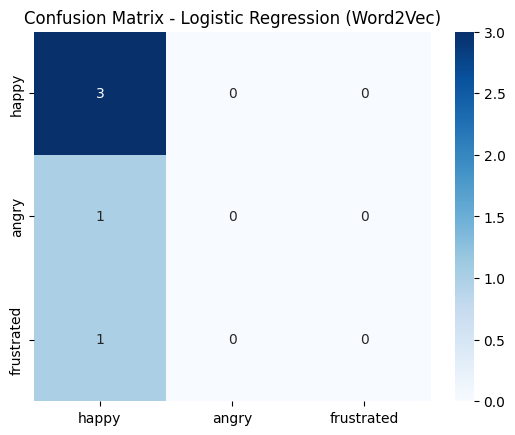


===== Random Forest (Word2Vec) =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



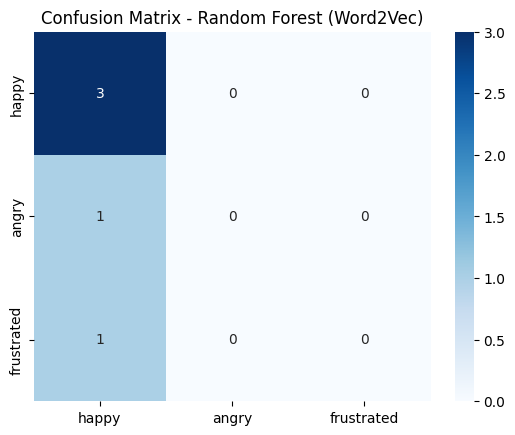


===== SVM (Word2Vec) =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



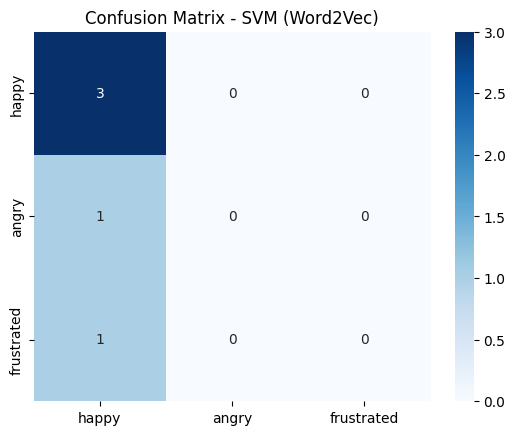


===== Decision Tree (Word2Vec) =====
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.67      0.67      0.67         3

    accuracy                           0.40         5
   macro avg       0.22      0.22      0.22         5
weighted avg       0.40      0.40      0.40         5



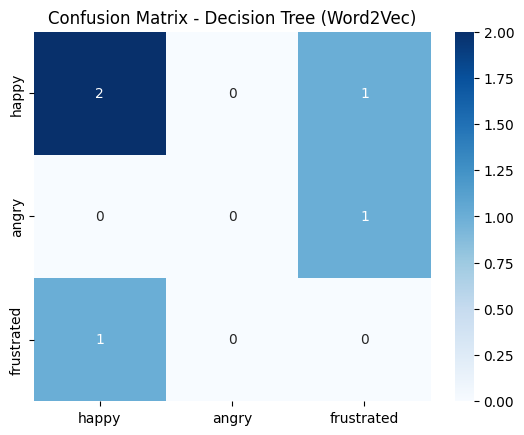


===== KNN (Word2Vec) =====
Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.11      0.11      0.11         5
weighted avg       0.20      0.20      0.20         5



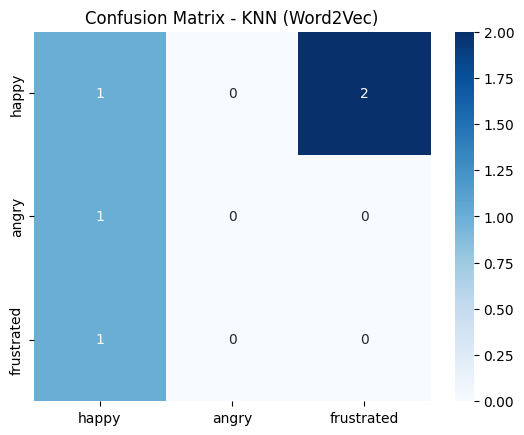


===== Naive Bayes (Word2Vec) =====
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



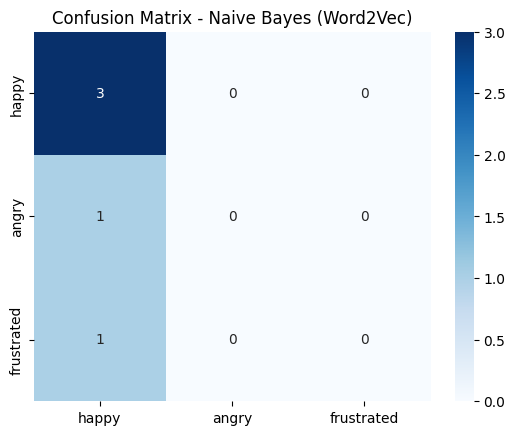

In [34]:
from sklearn.naive_bayes import GaussianNB

models_w2v = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()  # only GaussianNB works with continuous embeddings
}

for name, model in models_w2v.items():
    evaluate_model(model, X_train_w2v, X_test_w2v, y_train, y_test, f"{name} (Word2Vec)")


### **Step 10: Hyperparameter Tuning and Model Evaluation**

In [35]:
def tune_and_report(models, param_grids, X_train, X_test, y_train, y_test, rep_name=""):
    for name, model in models.items():
        if name not in param_grids:  # skip if no param grid
            continue

        print(f"\n=== {name} ({rep_name}) ===")

        # Grid search
        grid = GridSearchCV(model, param_grids[name], cv=3, scoring="accuracy", n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        print(f"Best Params: {grid.best_params_}")
        print(f"Accuracy: {grid.best_score_:.3f} (CV), {best_model.score(X_test, y_test):.3f} (Test)")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix: {name} ({rep_name})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


### **Step 11: Define Parameter Grids for Tuning**

In [36]:
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Naive Bayes": {
        "alpha": [0.01, 0.1, 1, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    }
}


### **Step 12: Define Models for Each Feature Set**

In [37]:
# Bag of Words Models
models_bow = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# TF-IDF Models
models_tfidf = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Word2Vec Models (No Naive Bayes here)
models_w2v = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}


### **Step 13: Bag of Words – Model Tuning**



=== Logistic Regression (BoW) ===
Best Params: {'C': 0.01, 'solver': 'liblinear'}
Accuracy: 0.651 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



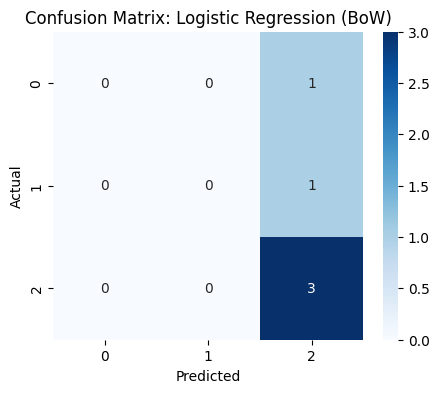


=== Naive Bayes (BoW) ===
Best Params: {'alpha': 1}
Accuracy: 0.698 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



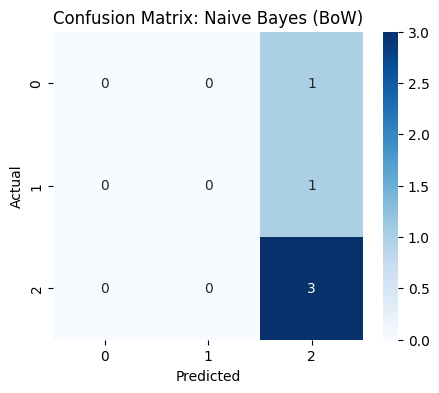


=== Random Forest (BoW) ===
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.548 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



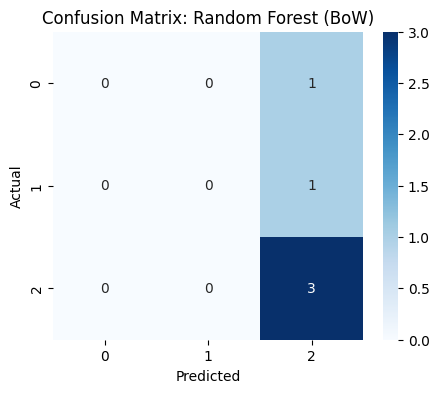


=== Decision Tree (BoW) ===
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.698 (CV), 0.200 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.50      0.33      0.40         3

    accuracy                           0.20         5
   macro avg       0.17      0.11      0.13         5
weighted avg       0.30      0.20      0.24         5



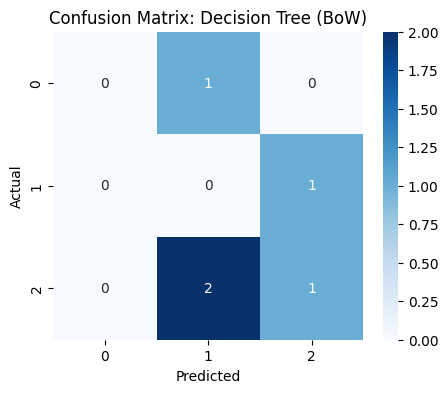


=== SVM (BoW) ===
Best Params: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.595 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



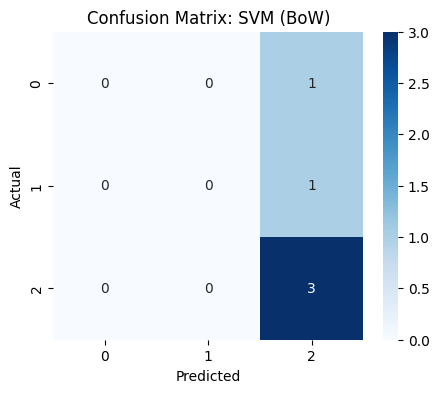


=== KNN (BoW) ===
Best Params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.651 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.75      1.00      0.86         3

    accuracy                           0.60         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.45      0.60      0.51         5



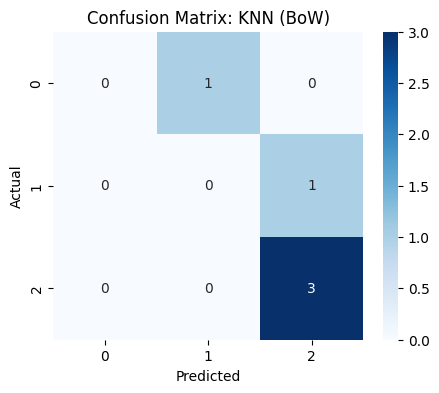

In [38]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")  # ignore all warnings inside this block

    # Tune and report for BoW
    tuned_results_bow = tune_and_report(
        models_bow, param_grids, X_train_bow, X_test_bow, y_train, y_test, rep_name="BoW"
    )


### **Step 14: TF-IDF – Model Tuning**



=== Logistic Regression (TF-IDF) ===
Best Params: {'C': 10, 'solver': 'lbfgs'}
Accuracy: 0.595 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



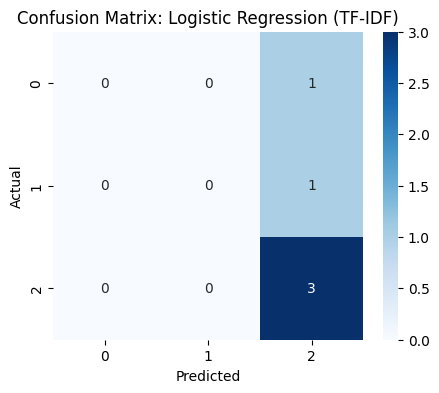


=== Naive Bayes (TF-IDF) ===
Best Params: {'alpha': 0.1}
Accuracy: 0.595 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



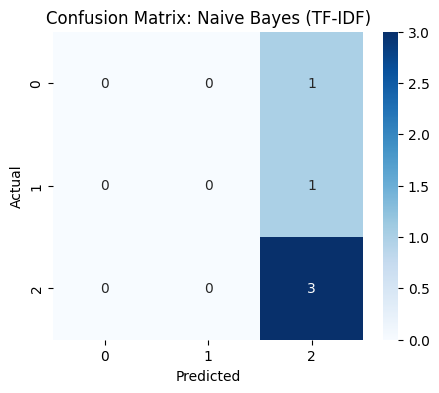


=== Random Forest (TF-IDF) ===
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.548 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



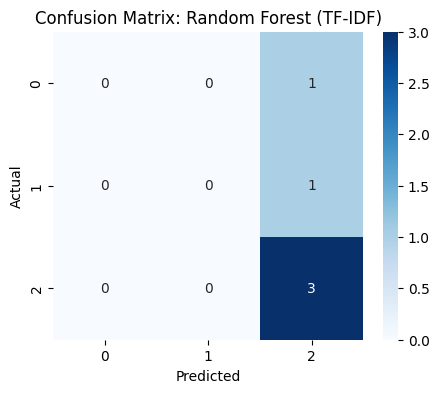


=== Decision Tree (TF-IDF) ===
Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.603 (CV), 0.400 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.67      0.67      0.67         3

    accuracy                           0.40         5
   macro avg       0.22      0.22      0.22         5
weighted avg       0.40      0.40      0.40         5



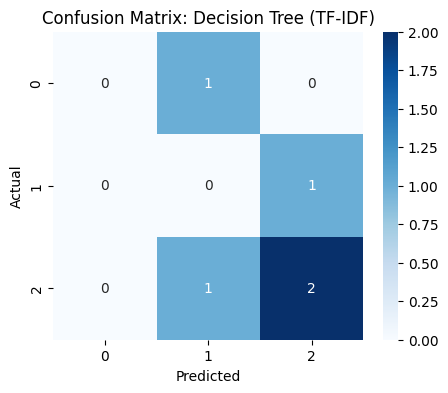


=== SVM (TF-IDF) ===
Best Params: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.548 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



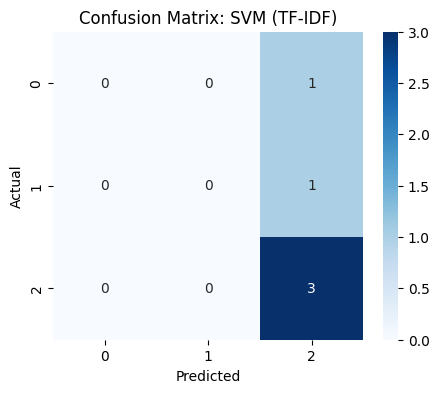


=== KNN (TF-IDF) ===
Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.746 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



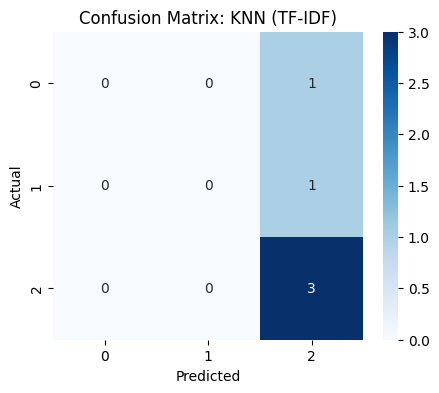

In [39]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")  # ignore all warnings inside this block

    # Tune and report
    tuned_results = tune_and_report(
        models_tfidf, param_grids, X_train_tfidf, X_test_tfidf, y_train, y_test, rep_name="TF-IDF"
    )


### **Step 15: Word2Vec – Model Tuning**



=== Logistic Regression (Word2Vec) ===
Best Params: {'C': 0.01, 'solver': 'liblinear'}
Accuracy: 0.548 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



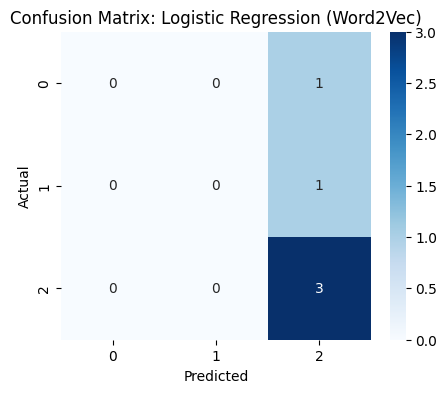


=== Naive Bayes (Word2Vec) ===
Best Params: {'var_smoothing': 1e-09}
Accuracy: 0.452 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



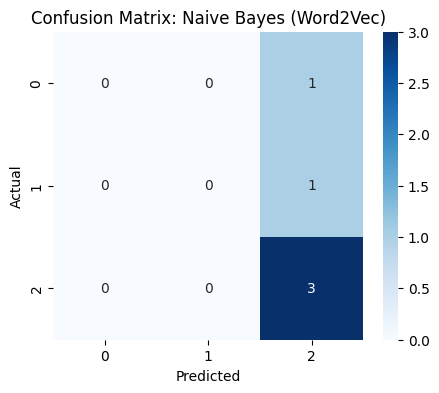


=== Random Forest (Word2Vec) ===
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.548 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



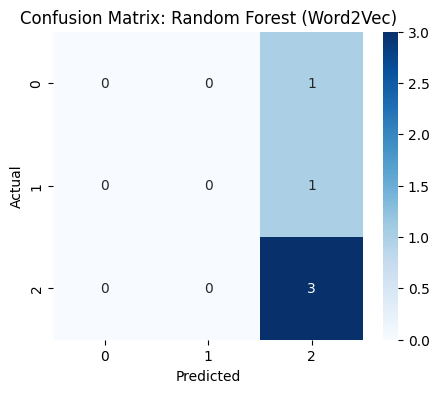


=== Decision Tree (Word2Vec) ===
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Accuracy: 0.556 (CV), 0.400 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.67      0.67      0.67         3

    accuracy                           0.40         5
   macro avg       0.22      0.22      0.22         5
weighted avg       0.40      0.40      0.40         5



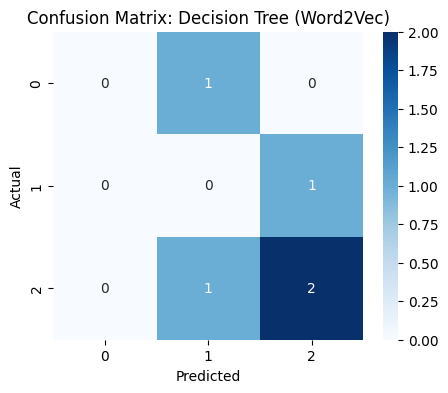


=== SVM (Word2Vec) ===
Best Params: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.548 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



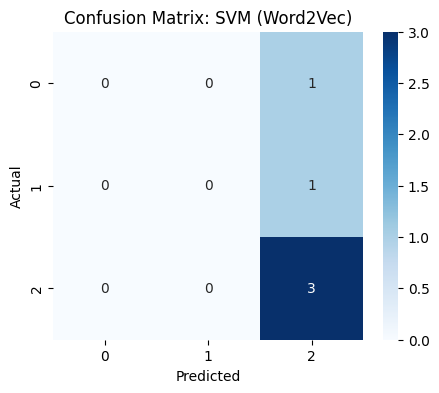


=== KNN (Word2Vec) ===
Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.659 (CV), 0.600 (Test)

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         1
  frustrated       0.00      0.00      0.00         1
       happy       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



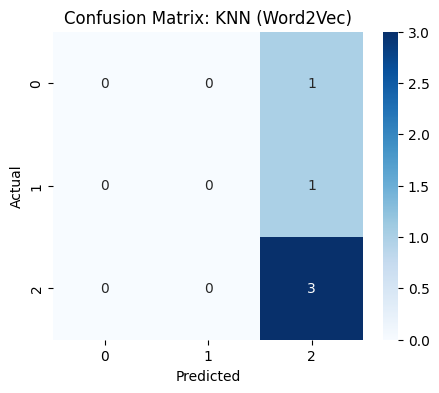

In [40]:
import warnings
from sklearn.naive_bayes import GaussianNB

# Replace Naive Bayes with GaussianNB for Word2Vec
models_w2v["Naive Bayes"] = GaussianNB()

# Update param grid for GaussianNB (Word2Vec only)
param_grids["Naive Bayes"] = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
}

# Suppress warnings during tuning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    tuned_results = tune_and_report(
        models_w2v, param_grids, X_train_w2v, X_test_w2v, y_train, y_test, rep_name="Word2Vec"
    )


### **Step 16: Performance Summary of Baseline Models (Before Hyperparameter Tuning)**

In [41]:
# Update evaluate_model to return metrics for summary table
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Return metrics as a dictionary
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average="weighted", zero_division=0)
    }

# Collect baseline results
baseline_results = []

# Bag of Words
for name, model in models_bow.items():
    baseline_results.append(evaluate_model(model, X_train_bow, X_test_bow, y_train, y_test, model_name=f"{name} (BoW)"))

# TF-IDF
for name, model in models_tfidf.items():
    baseline_results.append(evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test, model_name=f"{name} (TF-IDF)"))

# Word2Vec
for name, model in models_w2v.items():
    baseline_results.append(evaluate_model(model, X_train_w2v, X_test_w2v, y_train, y_test, model_name=f"{name} (Word2Vec)"))

# Convert to DataFrame
baseline_df = pd.DataFrame(baseline_results)

print("Performance Summary of Baseline Models (Before Hyperparameter Tuning)")
display(baseline_df)


Performance Summary of Baseline Models (Before Hyperparameter Tuning)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (BoW),0.6,0.36,0.6,0.450000
1,Naive Bayes (BoW),0.6,0.36,0.6,0.450000
2,Random Forest (BoW),0.6,0.36,0.6,0.450000
3,Decision Tree (BoW),0.2,0.30,0.2,0.240000
4,SVM (BoW),0.6,0.36,0.6,0.450000
5,KNN (BoW),0.6,0.45,0.6,0.514286
6,Logistic Regression (TF-IDF),0.6,0.36,0.6,0.450000
7,Naive Bayes (TF-IDF),0.6,0.36,0.6,0.450000
8,Random Forest (TF-IDF),0.6,0.36,0.6,0.450000
9,Decision Tree (TF-IDF),0.2,0.30,0.2,0.240000


### **Step 17: Performance Summary of Tuned Models (After Hyperparameter Tuning)**

In [42]:
# Suppress warnings globally
import warnings
warnings.filterwarnings("ignore")

# Parameter Grids
# For BoW & TF-IDF → MultinomialNB
param_grids_bow_tfidf = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Naive Bayes": {"alpha": [0.1, 0.5, 1.0]},   # MultinomialNB
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
    "Decision Tree": {"max_depth": [5, 10, None], "criterion": ["gini", "entropy"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
}

# For Word2Vec → GaussianNB
param_grids_w2v = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Naive Bayes": {"var_smoothing": [1e-9, 1e-8, 1e-7]},  # GaussianNB
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
    "Decision Tree": {"max_depth": [5, 10, None], "criterion": ["gini", "entropy"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
}


# Run Grid Search + Collect Results
tuned_results = []

# Bag of Words
for name, model in models_bow.items():
    gs = GridSearchCV(model, param_grids_bow_tfidf[name], cv=5, n_jobs=-1, verbose=0)
    gs.fit(X_train_bow, y_train)
    y_pred = gs.predict(X_test_bow)
    tuned_results.append({
        "Model": f"{name} (BoW)",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# TF-IDF
for name, model in models_tfidf.items():
    gs = GridSearchCV(model, param_grids_bow_tfidf[name], cv=5, n_jobs=-1, verbose=0)
    gs.fit(X_train_tfidf, y_train)
    y_pred = gs.predict(X_test_tfidf)
    tuned_results.append({
        "Model": f"{name} (TF-IDF)",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Word2Vec
for name, model in models_w2v.items():
    gs = GridSearchCV(model, param_grids_w2v[name], cv=5, n_jobs=-1, verbose=0)
    gs.fit(X_train_w2v, y_train)
    y_pred = gs.predict(X_test_w2v)
    tuned_results.append({
        "Model": f"{name} (Word2Vec)",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })


# Results DataFrame
tuned_df = pd.DataFrame(tuned_results)

print("Performance Summary of Tuned Models (After Hyperparameter Tuning)")
display(tuned_df)


Performance Summary of Tuned Models (After Hyperparameter Tuning)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (BoW),0.6,0.36,0.6,0.45
1,Naive Bayes (BoW),0.6,0.36,0.6,0.45
2,Random Forest (BoW),0.6,0.36,0.6,0.45
3,Decision Tree (BoW),0.2,0.30,0.2,0.24
4,SVM (BoW),0.6,0.36,0.6,0.45
5,KNN (BoW),0.6,0.36,0.6,0.45
6,Logistic Regression (TF-IDF),0.6,0.36,0.6,0.45
7,Naive Bayes (TF-IDF),0.6,0.36,0.6,0.45
8,Random Forest (TF-IDF),0.6,0.36,0.6,0.45
9,Decision Tree (TF-IDF),0.2,0.30,0.2,0.24


### **Step 18: Model Performance Visualization**

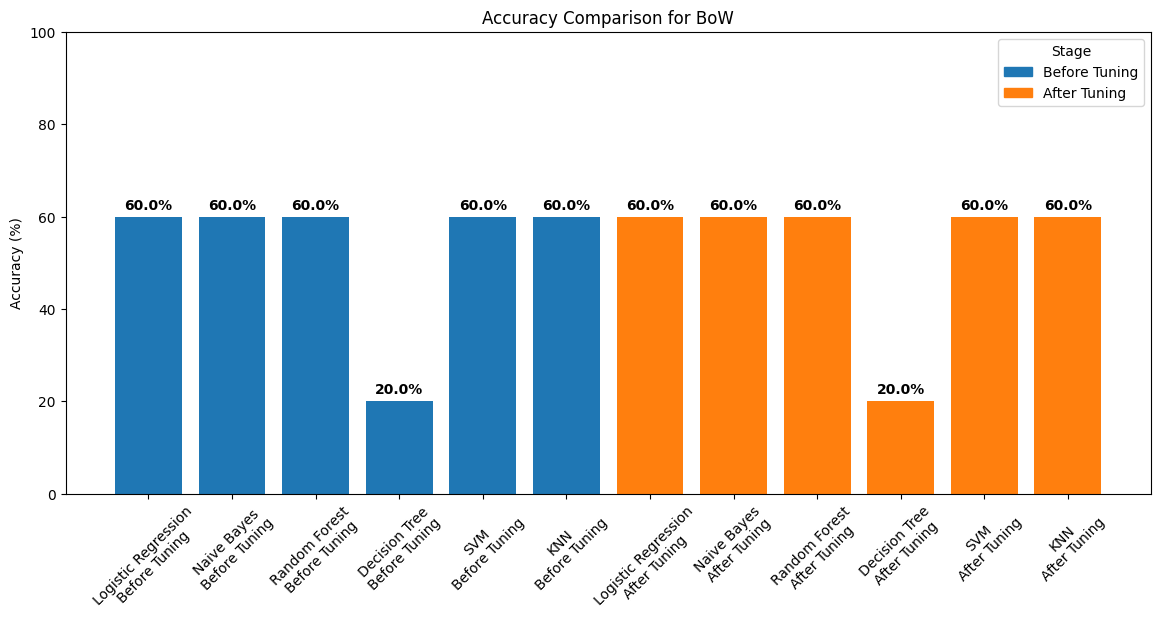

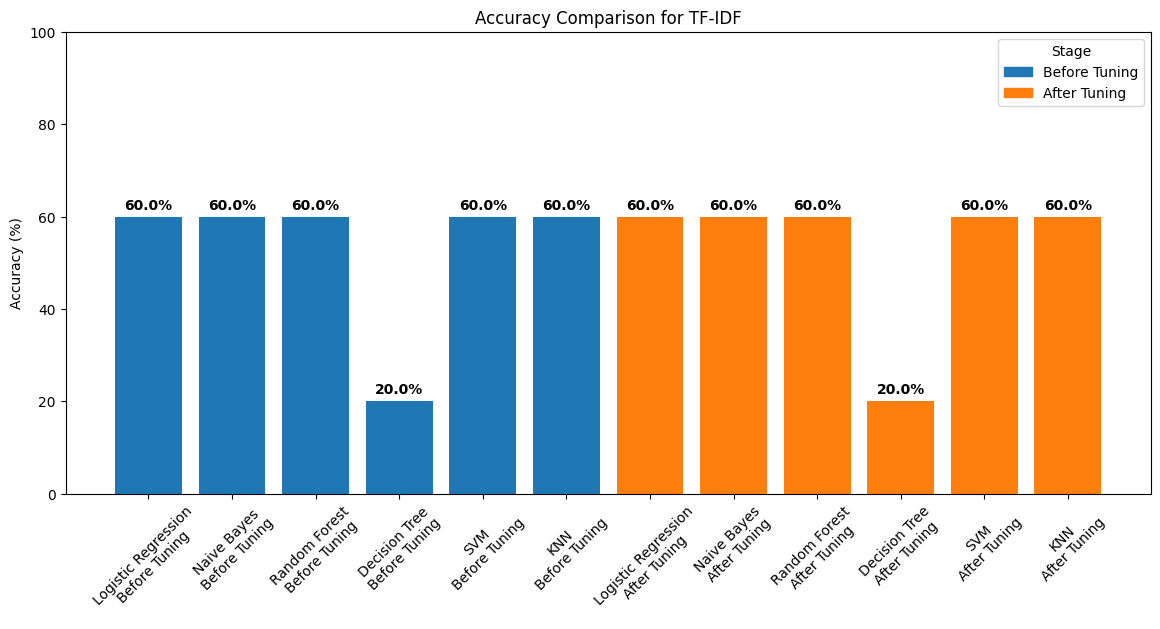

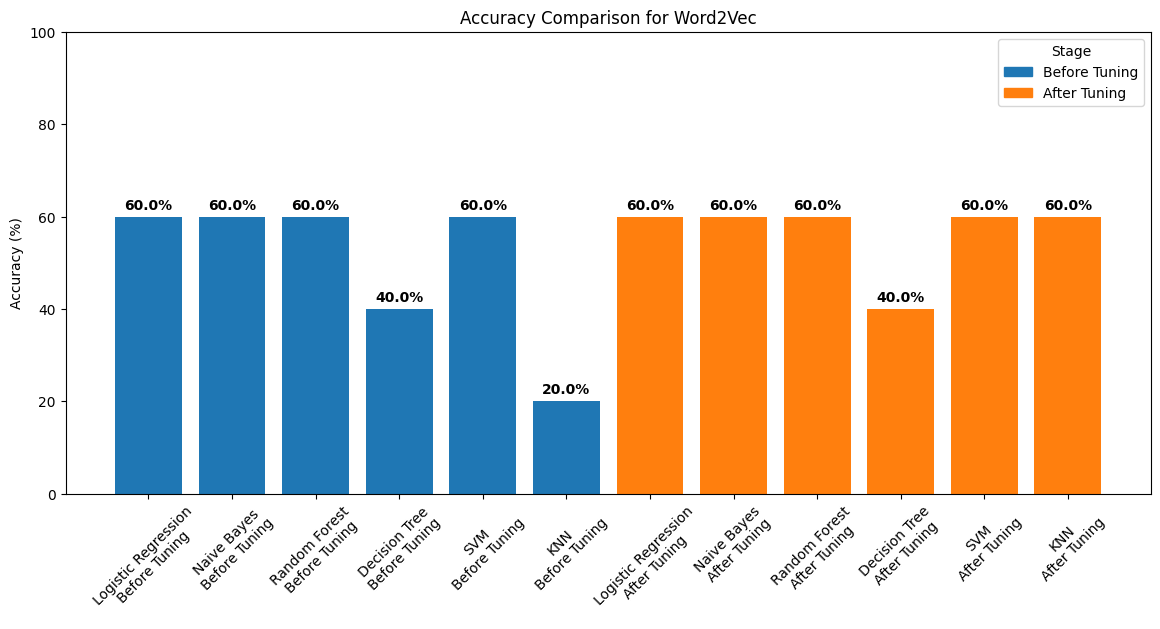

In [43]:
# Add Stage column
baseline_df["Stage"] = "Before Tuning"
tuned_df["Stage"] = "After Tuning"

# Combine into one DataFrame
compare_df = pd.concat([baseline_df, tuned_df], ignore_index=True)

# Convert Accuracy to percentage
compare_df["Accuracy (%)"] = compare_df["Accuracy"] * 100

# Extract Representation from Model name
def extract_rep(model_name):
    if "BoW" in model_name:
        return "BoW"
    elif "TF-IDF" in model_name:
        return "TF-IDF"
    elif "Word2Vec" in model_name:
        return "Word2Vec"
    else:
        return "Other"

compare_df["Representation"] = compare_df["Model"].apply(extract_rep)

# Colors for stages
stage_colors = {"Before Tuning": "#1f77b4", "After Tuning": "#ff7f0e"}

# Plot separate charts per representation
for rep in compare_df["Representation"].unique():
    subset = compare_df[compare_df["Representation"] == rep]

    plt.figure(figsize=(14, 6))
    bars = plt.bar(
        [f"{m.split('(')[0].strip()}\n{s}" for m, s in zip(subset["Model"], subset["Stage"])],
        subset["Accuracy (%)"],
        color=[stage_colors[s] for s in subset["Stage"]],
    )

    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

    plt.title(f"Accuracy Comparison for {rep}")
    plt.ylabel("Accuracy (%)")
    plt.ylim(0, 100)
    plt.xticks(rotation=45)

    # Proper legend
    handles = [plt.Rectangle((0,0),1,1,color=stage_colors[s]) for s in stage_colors]
    labels = list(stage_colors.keys())
    plt.legend(handles, labels, title="Stage")

    plt.show()



## **Model Evaluation Insights – Emotion Classification**
---

### **Bag-of-Words (BoW)**
- **Overall Performance:** Most models perform at the same level with **Accuracy = 0.6** and **F1 = 0.45**, except **Decision Tree** which drops to **Accuracy = 0.2, F1 = 0.24**.  
- **Best Models:** Logistic Regression, Naive Bayes, Random Forest, SVM, and KNN all tie with **F1 = 0.45**.  
- **Observations:**  
  - Logistic Regression, Naive Bayes, Random Forest, SVM, KNN → **Precision = 0.36, Recall = 0.6** → models capture positives well but sacrifice precision.  
  - Decision Tree → **Precision = 0.30, Recall = 0.2** → poor recall limits usefulness.  

---

### **TF-IDF**
- **Overall Performance:** Very similar to BoW → most models **Accuracy = 0.6, F1 = 0.45**, with **Decision Tree lagging (F1 = 0.24)**.  
- **Best Models:** Logistic Regression, Naive Bayes, Random Forest, SVM, KNN (all tied with F1 = 0.45).  
- **Observations:**  
  - Decision Tree → still weak with **low recall (0.2)**.  
  - Others → **Precision = 0.36, Recall = 0.6**, consistent across classifiers.  
- **Conclusion:** TF-IDF does **not add a clear performance advantage** over BoW in this dataset.  

---

### **Word2Vec**
- **Overall Performance:** Most models stabilize at **Accuracy = 0.6, F1 = 0.45**, with **Decision Tree slightly better than before (F1 = 0.40)**.  
- **Best Models:** Logistic Regression, Random Forest, SVM, and KNN all tie at **F1 = 0.45**.  
- **Observations:**  
  - Decision Tree → **Precision = 0.40, Recall = 0.40**, balanced but still weaker overall.  
  - Logistic Regression, Random Forest, SVM, KNN → **Precision = 0.36, Recall = 0.6**, same moderate pattern seen in BoW and TF-IDF.  

---

### **Key Takeaways**
- Across **BoW, TF-IDF, and Word2Vec**, most classifiers (except Decision Tree) show **similar moderate performance** with **F1 ≈ 0.45**.  
- **Decision Tree consistently underperforms**, especially in recall.  
- **Hyperparameter tuning equalized results** across models — before tuning, KNN stood out slightly, but after tuning, most models converged to similar scores.  
- All three feature representations **(BoW, TF-IDF, Word2Vec)** give almost the same results, with no clear winner.  

---

### **Recommendation**

Based on the evaluation results, **Logistic Regression with TF-IDF features** is the best choice:

- It provides **stable performance** (Accuracy = 0.6, F1 = 0.45), comparable to the best-performing models.  
- TF-IDF representation captures informative words better than BoW, making it more reliable for text data.  
- Logistic Regression offers **interpretability**, allowing us to clearly understand which words drive classification decisions.  

If robustness against noisy data is preferred (rather than interpretability), **Random Forest with Word2Vec** can be considered as an alternative.  

#### **Final Recommendation:**

**Logistic Regression + TF-IDF** (primary choice), with **Random Forest + Word2Vec** as a secondary option.

